<a href="https://colab.research.google.com/github/cow-coding/School-Project/blob/master/Computer%20Science/Artificial%20Intelligence/MNIST/DNN/DNN_MNIST_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import optimizers

# Data load & normalization

In [5]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(len(x_train), len(x_test))

60000 10000


## Data check

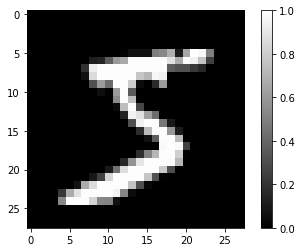

5


In [8]:
plt.imshow(x_train[0], cmap='gray')
plt.colorbar()
plt.show()

print(y_train[0])

# Modeling

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),                       
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


# Training

In [11]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.25)

Epoch 1/5
1407/1407 [==============================] - 5s 3ms/step - loss: 0.4714 - accuracy: 0.8626 - val_loss: 0.1462 - val_accuracy: 0.9545
Epoch 2/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1221 - accuracy: 0.9634 - val_loss: 0.1119 - val_accuracy: 0.9670
Epoch 3/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0782 - accuracy: 0.9760 - val_loss: 0.1140 - val_accuracy: 0.9645
Epoch 4/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0555 - accuracy: 0.9824 - val_loss: 0.0999 - val_accuracy: 0.9700
Epoch 5/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0427 - accuracy: 0.9872 - val_loss: 0.1099 - val_accuracy: 0.9693


# Evaluation

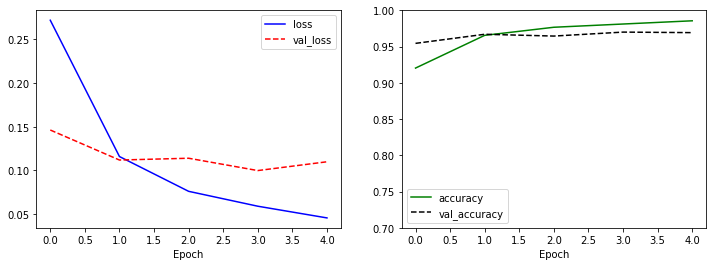

In [12]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [15]:
eval = model.evaluate(x_test, y_test)

print("Accuracy : %0.4f" %eval[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0911 - accuracy: 0.9715
Accuracy : 0.9715
